In [204]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from perovskiteml.data import PerovskiteDatabase

In [45]:
database_path = "../data/clean"
database = PerovskiteDatabase.load(database_path)
database.data

,Ref_ID,Ref_ID_temp,Ref_name_of_person_entering_the_data,Ref_data_entered_by_author,Ref_DOI_number,Ref_lead_author,Ref_publication_date,Ref_journal,Ref_part_of_initial_dataset,Ref_original_filename_data_upload,...,Outdoor_PCE_Tse80,Outdoor_PCE_after_1000_h,Outdoor_power_generated,Outdoor_link_raw_data_for_outdoor_trace,Outdoor_detaild_weather_data_available,Outdoor_link_detailed_weather_data,Outdoor_spectral_data_available,Outdoor_link_spectral_data,Outdoor_irradiance_measured,Outdoor_link_irradiance_data
0,1,1,Adam Hultqvist,False,10.1021/jp5126624,Sabba et al.,2015-01-06,The Journal of Physical Chemistry C,True,Historic dataset on 2020 11 22_v7.xlsx,...,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,NaN
1,2,2,Adam Hultqvist,False,10.1021/jp5126624,Sabba et al.,2015-01-06,The Journal of Physical Chemistry C,True,Historic dataset on 2020 11 22_v7.xlsx,...,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,NaN
2,3,3,Adam Hultqvist,False,10.1021/jp5126624,Sabba et al.,2015-01-06,The Journal of Physical Chemistry C,True,Historic dataset on 2020 11 22_v7.xlsx,...,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,NaN
3,4,4,Adam Hultqvist,False,10.1021/jp5126624,Sabba et al.,2015-01-06,The Journal of Physical Chemistry C,True,Historic dataset on 2020 11 22_v7.xlsx,...,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,NaN
4,5,5,Adam Hultqvist,False,10.1021/jp5126624,Sabba et al.,2015-01-06,The Journal of Physical Chemistry C,True,Historic dataset on 2020 11 22_v7.xlsx,...,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43247,43623,11,Daniele T. Cuzzupè,True,10.1002/solr.202300770,Cuzzupè et al.,2023-10-11,Solar RRL,False,2023-12-01 _v1.xlsx,...,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,NaN
43248,43624,12,Daniele T. Cuzzupè,True,10.1002/solr.202300770,Cuzzupè et al.,2023-10-11,Solar RRL,False,2023-12-01 _v1.xlsx,...,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,NaN
43249,43625,13,Daniele T. Cuzzupè,True,10.1002/solr.202300770,Cuzzupè et al.,2023-10-11,Solar RRL,False,2023-12-01 _v1.xlsx,...,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,NaN
43250,10974,10974,Gerrit Boschloo,False,10.1039/c8se00450a,Baranwal et al.,2018-10-23,Sustainable Energy & Fuels,True,Historic dataset on 2020 11 22_v7.xlsx,...,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,NaN


In [46]:
processed = database.data.loc[:, [
    "Perovskite_dimension_3D",
    "Perovskite_composition_perovskite_ABC3_structure",
    "Perovskite_composition_long_form",
]]
processed

,Perovskite_dimension_3D,Perovskite_composition_perovskite_ABC3_structure,Perovskite_composition_long_form
0,True,True,CsSnI3
1,True,True,CsSnBr0.3I2.7
2,True,True,CsSnBr1.5I1.5
3,True,True,CsSnBr2.7I0.3
4,True,True,CsSnBr3
...,...,...,...
43247,False,True,(PEA)0.08FA0.92SnI3
43248,False,True,(PEA)0.08FA0.92SnI3
43249,False,True,(PEA)0.08FA0.92SnI3
43250,True,True,MAPbI3


In [47]:
processed.dropna(subset=["Perovskite_composition_long_form"], inplace=True)
processed

,Perovskite_dimension_3D,Perovskite_composition_perovskite_ABC3_structure,Perovskite_composition_long_form
0,True,True,CsSnI3
1,True,True,CsSnBr0.3I2.7
2,True,True,CsSnBr1.5I1.5
3,True,True,CsSnBr2.7I0.3
4,True,True,CsSnBr3
...,...,...,...
43247,False,True,(PEA)0.08FA0.92SnI3
43248,False,True,(PEA)0.08FA0.92SnI3
43249,False,True,(PEA)0.08FA0.92SnI3
43250,True,True,MAPbI3


In [48]:
processed.dropna(subset=["Perovskite_composition_perovskite_ABC3_structure"], inplace=True)
processed = processed[processed["Perovskite_dimension_3D"]]
processed = processed[processed["Perovskite_composition_perovskite_ABC3_structure"]]
processed

,Perovskite_dimension_3D,Perovskite_composition_perovskite_ABC3_structure,Perovskite_composition_long_form
0,True,True,CsSnI3
1,True,True,CsSnBr0.3I2.7
2,True,True,CsSnBr1.5I1.5
3,True,True,CsSnBr2.7I0.3
4,True,True,CsSnBr3
...,...,...,...
43234,True,True,Cs0.18FA0.82PbBr0.24I2.82
43235,True,True,Cs0.18FA0.82PbBr0.24I2.82
43236,True,True,Cs0.18FA0.82PbBr0.24I2.82
43250,True,True,MAPbI3


In [49]:
multi_layer_count = processed["Perovskite_composition_long_form"].str.contains(r'\|').sum()
print(f"Number of entries with multiple perovskite layers: {multi_layer_count}")

Number of entries with multiple perovskite layers: 233


In [100]:
processed["Perovskite_composition_long_form"] = processed["Perovskite_composition_long_form"].astype(str)

multi_layer_mask = processed["Perovskite_composition_long_form"].str.contains(r'\|')
processed = processed[~multi_layer_mask]
processed

C:\Users\Violet\AppData\Local\Temp\ipykernel_24268\223260011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed["Perovskite_composition_long_form"] = processed["Perovskite_composition_long_form"].astype(str)


,Perovskite_dimension_3D,Perovskite_composition_perovskite_ABC3_structure,Perovskite_composition_long_form
0,True,True,CsSnI3
1,True,True,CsSnBr0.3I2.7
2,True,True,CsSnBr1.5I1.5
3,True,True,CsSnBr2.7I0.3
4,True,True,CsSnBr3
...,...,...,...
43234,True,True,Cs0.18FA0.82PbBr0.24I2.82
43235,True,True,Cs0.18FA0.82PbBr0.24I2.82
43236,True,True,Cs0.18FA0.82PbBr0.24I2.82
43250,True,True,MAPbI3


In [101]:
comp_data = processed.loc[:,["Perovskite_composition_long_form"]].copy()
comp_data.rename(columns={'Perovskite_composition_long_form': 'perovskite'}, inplace=True)
comp_data.reset_index(inplace=True, drop=True)
comp_data

,perovskite
0,CsSnI3
1,CsSnBr0.3I2.7
2,CsSnBr1.5I1.5
3,CsSnBr2.7I0.3
4,CsSnBr3
...,...
40529,Cs0.18FA0.82PbBr0.24I2.82
40530,Cs0.18FA0.82PbBr0.24I2.82
40531,Cs0.18FA0.82PbBr0.24I2.82
40532,MAPbI3


In [102]:
# Find Perovskites with interesting materials
comp_data[comp_data["perovskite"].str.contains(r"\(")]

,perovskite
902,(THM)0.025MA0.975PbI3
903,(THM)0.05MA0.95PbI3
904,(THM)0.075MA0.925PbI3
905,(THM)0.075MA0.925PbI3
906,(THM)0.1MA0.9PbI3
...,...
39236,(DMA)0.1MA0.9PbI3
40102,MAPb(Br0.7I0.3)xCl3-x
40508,(5-AVA)0.05MA0.95PbI3
40509,(5-AVA)0.05Cs0.05MA0.9PbI3


In [ ]:
# Find Compounds not in Parenthesis
# e.g. FA, MA
# Some will give us false compounds that we can sort out by hand
# ex: IP -> I Pb
def parse_compounds(string):
    compound_pattern = re.compile(
        r'\((?:[^)]+)\)(?:[\d.]+)?|([A-Z][A-Z]+)(?:[^b])(?:[\d.]+)?'
    )
    matches = compound_pattern.findall(string + " ")
    compounds = {}
    if len(matches) > 1:
        for match in matches:
            if match:
                compounds[match] = True
    else:
        compounds["none"] = True
    return compounds

In [146]:
parsed_compounds = comp_data["perovskite"].apply(parse_compounds)

In [147]:
compound_data = pd.json_normalize(parsed_compounds)
compound_data.fillna(False, inplace=True)
compound_data = comp_data.join(compound_data)
compound_data

C:\Users\Violet\AppData\Local\Temp\ipykernel_24268\4208851994.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  compound_data.fillna(False, inplace=True)


,perovskite,none,FA,MA,GU,HA,EDA,EA,PEA,NEA,...,IA,PDA,IM,PN,TN,BA,AN,PR,ISCN,PA
0,CsSnI3,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,CsSnBr0.3I2.7,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,CsSnBr1.5I1.5,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,CsSnBr2.7I0.3,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,CsSnBr3,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40529,Cs0.18FA0.82PbBr0.24I2.82,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
40530,Cs0.18FA0.82PbBr0.24I2.82,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
40531,Cs0.18FA0.82PbBr0.24I2.82,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
40532,MAPbI3,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [148]:
compound_data[compound_data["GU"]]["perovskite"]

28       Cs0.05FA0.788GU0.032MA0.129PbBr0.51I2.49
29       Cs0.05FA0.788GU0.065MA0.097PbBr0.51I2.49
30       Cs0.05FA0.788GU0.097MA0.065PbBr0.51I2.49
31       Cs0.05FA0.788GU0.129MA0.032PbBr0.51I2.49
32              Cs0.05FA0.788GU0.162PbBr0.51I2.49
420                              FA0.95GU0.05SnI3
421                                FA0.9GU0.1SnI3
422                              FA0.85GU0.15SnI3
423                                FA0.8GU0.2SnI3
424                              FA0.75GU0.25SnI3
425                                FA0.7GU0.3SnI3
426                                FA0.8GU0.2SnI3
8484          Cs0.04FA0.71GU0.1MA0.15PbBr0.5I2.49
11884                            GU0.14MA0.86PbI3
11886                            GU0.14MA0.86PbI3
20198                            GU0.14MA0.86PbI3
24733      Cs0.05FA0.81GU0.025MA0.11PbBr0.39I2.61
24734       Cs0.05FA0.79GU0.05MA0.11PbBr0.39I2.61
24735      Cs0.05FA0.76GU0.075MA0.11PbBr0.39I2.61
24736      Cs0.05FA0.75GU0.075MA0.10PbBr0.39I2.61


In [149]:
compound_data[compound_data["PA"]]["perovskite"]

27490    MA0.5PA0.5PbI3
Name: perovskite, dtype: object

In [151]:
compound_data[compound_data["ISCN"]]["perovskite"]

27141    MAPbISCN
Name: perovskite, dtype: object

In [152]:
compound_data[compound_data["PR"]]["perovskite"]

26921    FA8PR2Pb9I28
Name: perovskite, dtype: object

In [153]:
compound_data[compound_data["AN"]]["perovskite"]

24662          AN0.2MA0.8PbI3
24663    AN0.15FA0.5MA0.8PbI3
24664    AN0.15Cs0.5MA0.8PbI3
24665          AN0.1MA0.9PbI3
24666          AN0.3MA0.7PbI3
24667          AN0.4MA0.6PbI3
37956        AN0.03MA0.97PbI3
37958      AN0.015MA0.985PbI3
37959        AN0.03MA0.97PbI3
37960        AN0.06MA0.94PbI3
37961        AN0.09MA0.91PbI3
37962          AN0.5MA0.5PbI3
Name: perovskite, dtype: object

In [154]:
compound_data[compound_data["BA"]]["perovskite"]

21432                BA0.15FA0.85SnI3
21433                BA0.15FA0.85SnI3
30294    BA0.1Cs0.15FA0.75PbBr0.3I2.7
Name: perovskite, dtype: object

In [155]:
compound_data[compound_data["TN"]]["perovskite"]

20735    FA0.95TN0.05SnI3
20736    FA0.90TN0.10SnI3
20737    FA0.85TN0.15SnI3
20738      FA0.8TN0.2SnI3
Name: perovskite, dtype: object

In [156]:
compound_data[compound_data["PN"]]["perovskite"]

20731    FA0.05PN0.95SnI3
20732    FA0.10PN0.90SnI3
20733    FA0.15PN0.85SnI3
20734      FA0.2PN0.8SnI3
Name: perovskite, dtype: object

In [157]:
compound_data[compound_data["IM"]]["perovskite"]

19742             IM0.1MA0.9PbI3
19744             IM0.2MA0.8PbI3
19745             IM0.3MA0.7PbI3
22229    IM0.025MA0.0250.975PbI3
22230       IM0.05MA0.050.95PbI3
22231          IM0.1MA0.10.9PbI3
22232       IM0.15MA0.150.85PbI3
22233          IM0.2MA0.20.8PbI3
22234       IM0.25MA0.250.75PbI3
22235          IM0.3MA0.30.7PbI3
22236          IM0.4MA0.40.6PbI3
22237          IM0.5MA0.50.5PbI3
22238          IM0.6MA0.60.4PbI3
31712          IM0.005MA99.5PbI3
31713           IM0.01MA0.99PbI3
31714           IM0.03MA0.97PbI3
31715           IM0.05MA0.95PbI3
Name: perovskite, dtype: object

In [158]:
compound_data[compound_data["PDA"]]["perovskite"]

18917    Cs0.02FA0.15PDA0.82PbI3
Name: perovskite, dtype: object

In [159]:
compound_data[compound_data["IA"]]["perovskite"]

18079    IA0.05MA0.95PbI3
Name: perovskite, dtype: object

In [160]:
compound_data[compound_data["GA"]]["perovskite"]

12402    Cs0.32FA0.58GA0.1PbBr0.81I2.19
36889    Cs0.15FA0.8GA0.05PbBr0.45I2.55
Name: perovskite, dtype: object

In [162]:
compound_data[compound_data["NEA"]]["perovskite"]

5705    EA3MA2NEAPb4I13
Name: perovskite, dtype: object

In [163]:
compound_data[compound_data["PEA"]]["perovskite"]

5704    EA2MA3PEAPb4I13
Name: perovskite, dtype: object

In [164]:
compound_data[compound_data["EA"]]["perovskite"]

5704                  EA2MA3PEAPb4I13
5705                  EA3MA2NEAPb4I13
23848                EA0.15MA0.85PbI3
30293    Cs0.15EA0.75FA0.1PbBr0.3I2.7
30654                  EA0.1MA0.9PbI3
30655                  EA0.2MA0.8PbI3
30656                  EA0.3MA0.7PbI3
30657                  EA0.4MA0.6PbI3
30658                  EA0.5MA0.5PbI3
37094                 EA0.5MA0.5PbBr3
37095                 EA0.5MA0.5PbBr3
Name: perovskite, dtype: object

In [165]:
compound_data[compound_data["EDA"]]["perovskite"]

3909    EDA0.01FA0.99SnI3
3910    EDA0.01FA0.99SnI3
Name: perovskite, dtype: object

In [166]:
compound_data[compound_data["HA"]]["perovskite"]

2406     HA0.1MA0.9SnI3
2407     HA0.2MA0.8SnI3
2408     HA0.3MA0.7SnI3
22176    HA0.1MA0.9PbI3
Name: perovskite, dtype: object

## List of Compounds in Perovskite DB

In [188]:
compound_list = list(compound_data.iloc[:, 2:].columns)
compound_string = r"|".join(compound_list)
compound_string

'FA|MA|GU|HA|EDA|EA|PEA|NEA|GA|IA|PDA|IM|PN|TN|BA|AN|PR|ISCN|PA'

In [192]:
composition_pattern = re.compile(r'\(([^)]+)\)|(' + compound_string + r')|([A-Z][a-z]*)')
def parse_composition(string):
    matches = composition_pattern.findall(string)
    components = {}
    for group in matches:
        component = group[0] or group[1] or group[2]
        components[component] = True
    return components

In [194]:
parsed_composition = comp_data["perovskite"].apply(parse_composition)

In [198]:
composition_data = pd.json_normalize(parsed_composition)
composition_data.fillna(False, inplace=True)
# composition_data = comp_data.join(composition_data)
composition_data

C:\Users\Violet\AppData\Local\Temp\ipykernel_24268\423079306.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  composition_data.fillna(False, inplace=True)


,Cs,Sn,I,Br,MA,Pb,FA,GU,Sb,Bi,...,In,B,D,A,1.3-Pr(NH3,Aa,Br0.7I0.3,Ti,Clx,5-AVAI
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40529,True,False,True,True,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
40530,True,False,True,True,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
40531,True,False,True,True,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
40532,False,False,True,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [229]:
value_counts = composition_data.sum().sort_values(ascending=False)

In [230]:
def plot_barh(
    val_counts: pd.Series,
    title: str = "",
    ylabel: str = "feature",
    xscale: str = "log",
    xmargin: float = 0.2,
    max_display: int = 20,  # How many features to show
):
    other_counts = val_counts[max_display:].sum()
    val_counts = val_counts[:max_display].copy()
    val_counts["other"] = other_counts
    
    fig, ax = plt.subplots()
    hbars = ax.barh(val_counts.index.astype(str), val_counts.values, align="center")
    ax.bar_label(hbars)
    ax.invert_yaxis()
    ax.margins(x=xmargin)
    ax.set_xscale(xscale)
    ax.set_title(title)
    ax.set_xlabel("counts")
    ax.set_ylabel(ylabel)
    fig.tight_layout()
    return (fig, ax)

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Perovskite Ion Frequency'}, xlabel='counts', ylabel='Ions'>)

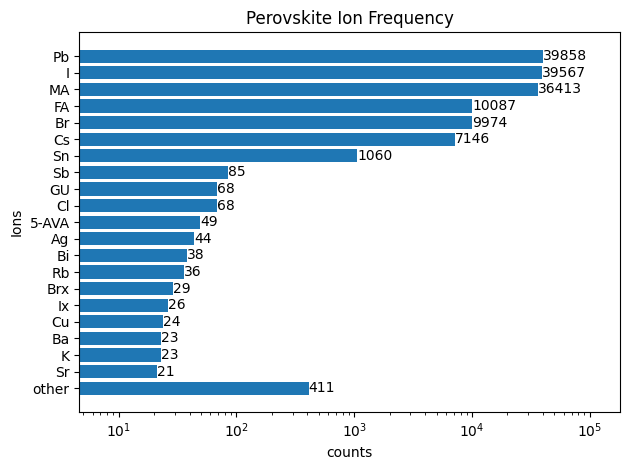

In [345]:
plot_barh(
    value_counts,
    title="Perovskite Ion Frequency",
    ylabel="Ions"
)

In [241]:
elements_pattern = re.compile(
    r'\(((?:[^()]|\([^()]*\))*)\)(\d*\.\d+|\d*)' + 
    f'|({compound_string})'+r'(\d*\.\d+|\d*)' +
    r'|([A-Z][a-z]*)(\d*\.\d+|\d*)'
)
elements_pattern

re.compile(r'\(((?:[^()]|\([^()]*\))*)\)(\d*\.\d+|\d*)|(FA|MA|GU|HA|EDA|EA|PEA|NEA|GA|IA|PDA|IM|PN|TN|BA|AN|PR|ISCN|PA)(\d*\.\d+|\d*)|([A-Z][a-z]*)(\d*\.\d+|\d*)',
           re.UNICODE)

Example usage of the regex pattern [here](https://regexr.com/8dn4a).

In [242]:
# Function to parse the ABX3 string
def parse_abx3(string):
    matches = elements_pattern.findall(string)
    elements = {}
    for groups in matches:
        if groups[0]:
            fraction = float(groups[1]) if groups[1] else 1.0
            elements[groups[0]] = fraction
        if groups[2]:
            fraction = float(groups[3]) if groups[3] else 1.0
            elements[groups[2]] = fraction
        if groups[4]:
            fraction = float(groups[5]) if groups[5] else 1.0
            elements[groups[4]] = fraction
    return elements

In [244]:
parsed_elements = comp_data["perovskite"].apply(parse_abx3)
elements_data = pd.json_normalize(parsed_elements)
elements_data.fillna(0, inplace=True)
elements_data

,Cs,Sn,I,Br,MA,Pb,FA,GU,Sb,Bi,...,In,B,D,A,1.3-Pr(NH3)2,Aa,Br0.7I0.3,Ti,Clx,5-AVAI
0,1.00,1.0,3.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.00,1.0,2.70,0.30,0.00,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.00,1.0,1.50,1.50,0.00,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.00,1.0,0.30,2.70,0.00,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.00,1.0,0.00,3.00,0.00,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40529,0.18,0.0,2.82,0.24,0.00,1.0,0.82,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40530,0.18,0.0,2.82,0.24,0.00,1.0,0.82,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40531,0.18,0.0,2.82,0.24,0.00,1.0,0.82,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40532,0.00,0.0,3.00,0.00,1.00,1.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [304]:
def group_elements(perovskite: dict):
    num_elements = len(perovskite)
    ratio = 0.0
    composition = {"a":{}, "b":{}, "x":{}}
    for element, fraction in perovskite.items():
        if ratio < 0.995:
            composition["a"][element] = fraction
        elif ratio < 1.995:
            composition["b"][element] = fraction
        else:
            composition["x"][element] = fraction
        ratio += fraction
    return composition

In [305]:
parsed_groups = parsed_elements.apply(group_elements)
parsed_groups

0        {'a': {'Cs': 1.0}, 'b': {'Sn': 1.0}, 'x': {'I'...
1        {'a': {'Cs': 1.0}, 'b': {'Sn': 1.0}, 'x': {'Br...
2        {'a': {'Cs': 1.0}, 'b': {'Sn': 1.0}, 'x': {'Br...
3        {'a': {'Cs': 1.0}, 'b': {'Sn': 1.0}, 'x': {'Br...
4        {'a': {'Cs': 1.0}, 'b': {'Sn': 1.0}, 'x': {'Br...
                               ...                        
40529    {'a': {'Cs': 0.18, 'FA': 0.82}, 'b': {'Pb': 1....
40530    {'a': {'Cs': 0.18, 'FA': 0.82}, 'b': {'Pb': 1....
40531    {'a': {'Cs': 0.18, 'FA': 0.82}, 'b': {'Pb': 1....
40532    {'a': {'MA': 1.0}, 'b': {'Pb': 1.0}, 'x': {'I'...
40533    {'a': {'FA': 0.11, 'MA': 0.89}, 'b': {'Pb': 1....
Name: perovskite, Length: 40534, dtype: object

In [325]:
groups_data = pd.json_normalize(parsed_groups)
split_columns = [col.split(".", 1) for col in groups_data.columns]
groups_data.columns = pd.MultiIndex.from_tuples(split_columns)
groups_data.fillna(0, inplace=True)
groups_data

a    b     x           a    b     a         x    a  ...    x       \
         Cs   Sn     I    Br    MA   Pb    FA   GU   Sb   Pb  ...    A   Cs   
0      1.00  1.0  3.00  0.00  0.00  0.0  0.00  0.0  0.0  0.0  ...  0.0  0.0   
1      1.00  1.0  2.70  0.30  0.00  0.0  0.00  0.0  0.0  0.0  ...  0.0  0.0   
2      1.00  1.0  1.50  1.50  0.00  0.0  0.00  0.0  0.0  0.0  ...  0.0  0.0   
3      1.00  1.0  0.30  2.70  0.00  0.0  0.00  0.0  0.0  0.0  ...  0.0  0.0   
4      1.00  1.0  0.00  3.00  0.00  0.0  0.00  0.0  0.0  0.0  ...  0.0  0.0   
...     ...  ...   ...   ...   ...  ...   ...  ...  ...  ...  ...  ...  ...   
40529  0.18  0.0  2.82  0.24  0.00  1.0  0.82  0.0  0.0  0.0  ...  0.0  0.0   
40530  0.18  0.0  2.82  0.24  0.00  1.0  0.82  0.0  0.0  0.0  ...  0.0  0.0   
40531  0.18  0.0  2.82  0.24  0.00  1.0  0.82  0.0  0.0  0.0  ...  0.0  0.0   
40532  0.00  0.0  3.00  0.00  1.00  1.0  0.00  0.0  0.0  0.0  ...  0.0  0.0   
40533  0.00  0.0  3.00  0.00  0.89  1.0  0.11  0.0  0.0  0.0  ...  0.0  0.0   

                 a              x    a    b    x    b      a  
      1.3-Pr(NH3)2   Aa Br0.7I0.3   Sr   Ti  Clx   Ag 5-AVAI  
0              0.0  0.0       0.0  0.0  0.0  0.0  0.0    0.0  
1              0.0  0.0       0.0  0.0  0.0  0.0  0.0    0.0  
2              0.0  0.0       0.0  0.0  0.0  0.0  0.0    0.0  
3              0.0  0.0       0.0  0.0  0.0  0.0  0.0    0.0  
4              0.0  0.0       0.0  0.0  0.0  0.0  0.0    0.0  
...            ...  ...       ...  ...  ...  ...  ...    ...  
40529          0.0  0.0       0.0  0.0  0.0  0.0  0.0    0.0  
40530          0.0  0.0       0.0  0.0  0.0  0.0  0.0    0.0  
40531          0.0  0.0       0.0  0.0  0.0  0.0  0.0    0.0  
40532          0.0  0.0       0.0  0.0  0.0  0.0  0.0    0.0  
40533          0.0  0.0       0.0  0.0  0.0  0.0  0.0    0.0  

[40534 rows x 108 columns]

## A site Ions

In [326]:
groups_data["a"]

,Cs,MA,FA,GU,Pb,Rb,THM,HA,EDA,Ace,...,Mn,AVA,Cu,Ag,Csx,B,1.3-Pr(NH3)2,Aa,Sr,5-AVAI
0,1.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40529,0.18,0.00,0.82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40530,0.18,0.00,0.82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40531,0.18,0.00,0.82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40532,0.00,1.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'A Site Ions'}, xlabel='counts', ylabel='Ions'>)

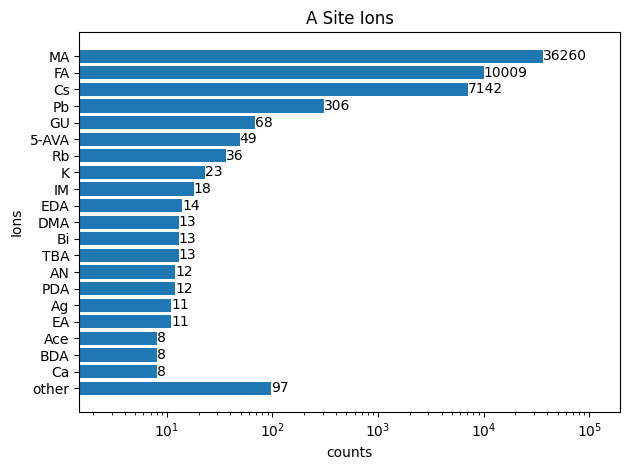

In [340]:
asite_bmatrix: pd.DataFrame = groups_data["a"] > 0
asite_value_counts = asite_bmatrix.sum().sort_values(ascending=False)
plot_barh(
    asite_value_counts,
    title="A Site Ions",
    ylabel="Ions"
)

## B site Ions

In [327]:
groups_data["b"]

,Sn,Pb,I,Br,MA,Ge,Zn,Hg,Bi,Ni,...,Fe,Ca,Y,Nb,La,Mn,In,D,Ti,Ag
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40529,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40530,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40531,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40532,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'B Site Ions'}, xlabel='counts', ylabel='Ions'>)

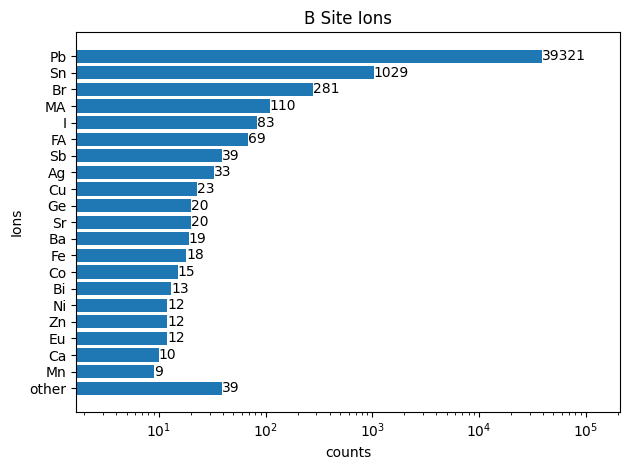

In [342]:
bsite_bmatrix: pd.DataFrame = groups_data["b"] > 0
bsite_value_counts = bsite_bmatrix.sum().sort_values(ascending=False)
plot_barh(
    bsite_value_counts,
    title="B Site Ions",
    ylabel="Ions"
)

## X site Ions

In [328]:
groups_data["x"]

,I,Br,Sb,Bi,Sn,Pb,Zn,MA,PEA,NEA,...,ISCN,S,Brx,Ix,F,Pbx,A,Cs,Br0.7I0.3,Clx
0,3.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.70,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.50,1.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.30,2.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40529,2.82,0.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40530,2.82,0.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40531,2.82,0.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40532,3.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'X Site Ions'}, xlabel='counts', ylabel='Ions'>)

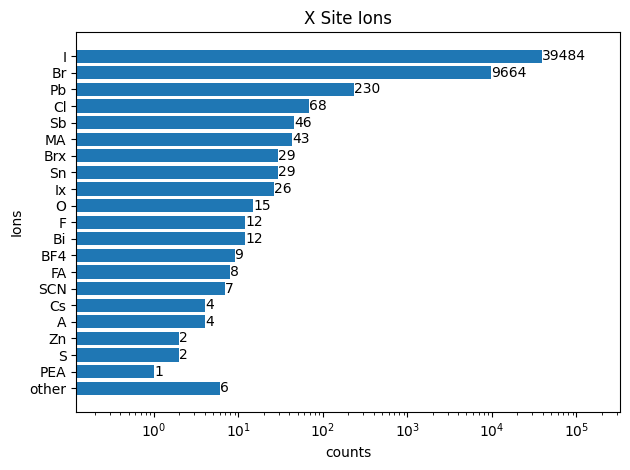

In [343]:
xsite_bmatrix: pd.DataFrame = groups_data["x"] > 0
xsite_value_counts = xsite_bmatrix.sum().sort_values(ascending=False)
plot_barh(
    xsite_value_counts,
    title="X Site Ions",
    ylabel="Ions"
)